In [1]:
import librosa
import math
import librosa.display as display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.mixture import GaussianMixture
import fastaudio.core.signal as fcs
import fastaudio.augment.all
import GetTranscription
lvpath ="E:\Datasets\Voice\Librivox\dev\LibriSpeech\dev-clean"
mcvpath ="E:\Datasets\Voice\Mozilla Common Voice\en\cv-corpus-6.1-2020-12-11\en"
single_word = "./samples/eye.wav"
clips =fcs.get_audio_files(lvpath)

C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\torchaudio\extension\extension.py:13: UserWarning: torchaudio C++ extension is not available.
  warnings.warn('torchaudio C++ extension is not available.')
C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\torchaudio\backend\utils.py:46: UserWarning: "torchaudio.USE_SOUNDFILE_LEGACY_INTERFACE" flag is deprecated and will be removed in 0.9.0. Please remove the use of flag.
  warnings.warn(


E:\Datasets\Voice\Librivox\dev\LibriSpeech\dev-clean\2277\149874\2277-149874-0003.flac
HE WAS OF A CLEAN SAVING DISPOSITION AND HAD ALREADY PAID A NUMBER OF MONTHLY INSTALMENTS ON TWO LOTS FAR OUT ON THE WEST SIDE
(30464,)


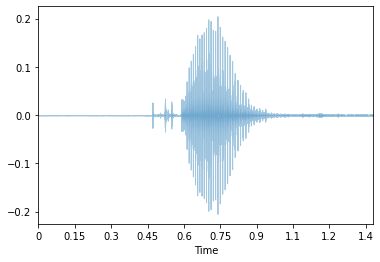

In [3]:
clip= clips[652]
audio,sr = librosa.load(single_word)
print(clip)
print(GetTranscription.get_file_transcript(clip))
print(audio.shape)
librosa.display.waveplot(audio,sr=sr,alpha=0.4)
ipd.Audio(audio[:],rate=sr)


In [4]:
def three_features(audio):
    energy =normalize(librosa.pcen(audio,sr=sr))
    #np.nan_to_num(energy, copy=False, nan=0.0, posinf=None, neginf=None)
    zcr = normalize(librosa.zero_crossings(energy))
    spectral_centroids = librosa.feature.spectral_centroid(audio, sr=sr)[0]
    acr = librosa.autocorrelate(spectral_centroids)
    return np.c_[energy,zcr,acr]
    
 

In [7]:
w_e= librosa.feature.spectral_bandwidth(audio+0.01, sr=sr)[0]

In [9]:
wo_e=librosa.feature.spectral_bandwidth(audio, sr=sr)[0]
wo_e.shape

(332,)

In [8]:
print (w_e.shape)
print(audio.shape)

(60,)
(30464,)


In [13]:
librosa.autocorrelate(wo_e).shape

(332,)

In [75]:
librosa.zero_crossings(audio).shape

(128111,)

In [76]:
librosa.pcen(audio).shape

(128111,)

In [32]:
rs= fastaudio.augment.preprocess.RemoveSilence()

In [38]:
rs.remove_type=fastaudio.augment.preprocess.RemoveType.Split


In [40]:
remover = fastaudio.core.signal.(rs)
    

In [9]:
from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor
tokenizer = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")

ModuleNotFoundError: No module named 'transformers'

In [63]:
input_values = tokenizer(audio, return_tensors = ["pt"]).input_values

AssertionError: text input must of type `str` (single example), `List[str]` (batch or single pretokenized example) or `List[List[str]]` (batch of pretokenized examples).